In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa

plt.rcParams['figure.figsize'] = [10, 3]



plt.rcParams['figure.figsize'] = [10, 3] changes the default plot size for this notebook until it is cahnged or specified another way.
This just helps us not having to do plt.subplots(figsize=(10,3)) in each plot time.

In [2]:
data_dir = '/Users/yingli/Development/TopicsInDataScience/voice_clip_selected/'
voice_list_filename = "voice_clip_meta_data.csv"
voice_list = pd.read_csv(data_dir + voice_list_filename)

In [3]:
voice_list.groupby(["age","gender"]).nunique()

client_id  path  sentence_id  sentence  up_votes  \
age       gender                                                              
eighties  female_feminine          1     2            2         2         2   
          male_masculine           4    25           25        25         3   
fifties   female_feminine         35   393          393       393         6   
          male_masculine          53   686          686       686         7   
fourties  female_feminine         42   500          500       500         5   
          male_masculine         123  1765         1765      1765        10   
nineties  male_masculine           1    89           89        89         3   
seventies female_feminine         22   226          226       226         5   
          male_masculine          41   464          464       464         4   
sixties   female_feminine         24   507          507       507         6   
          male_masculine          42   502          502       502         4   
teens     female_feminine         52   736          736       736         7   
          male_masculine         119  1769         1769      1769         9   
thirties  female_feminine         58   941          941       941         6   
          male_masculine         195  3064         3064      3064         8   
twenties  female_feminine         81  1076         1076      1076         8   
          male_masculine         318  3965         3965      3965         9   

                           down_votes  accents  
age       gender                                
eighties  female_feminine           1        1  
          male_masculine            1        2  
fifties   female_feminine           1        6  
          male_masculine            1       12  
fourties  female_feminine           1        6  
          male_masculine            1       20  
nineties  male_masculine            1        1  
seventies female_feminine           1        4  
          male_masculine            1        8  
sixties   female_feminine           1        8  
          male_masculine            1        7  
teens     female_feminine           1       10  
          male_masculine            1       21  
thirties  female_feminine           1       14  
          male_masculine            1       19  
twenties  female_feminine           1       18  
          male_masculine            1       29

In [4]:
audiofile = [
    "common_voice_en_487076.mp3" # eighties female
    ,"common_voice_en_20661764.mp3" # eighties male
    ,"common_voice_en_1716.mp3" # seventies female
    ,"common_voice_en_20002554.mp3" # sixties male
    ,"common_voice_en_30282850.mp3" # fifties female
    ,"common_voice_en_39750682.mp3" # twenties female
    ,"common_voice_en_37110064.mp3"  # teen male
    ,"common_voice_en_31267867.mp3" # teen female
    ]

In [5]:
voice_list[voice_list.path.isin(audiofile)]

client_id  \
8      643b543072f59c2d79dc0d21720b687b7c03c9ea4ed56c...   
91     ece665f4b4c2d79a8c661dd2d38aaf8876aa8f710ad983...   
104    ff7b8047b2c8785ef74cb43ed0671b598719e31ee9cd59...   
130    0a0c864736552adbf79e720418fb93efaf604eea02ab6e...   
148    15cdfd8ce19ff8a728f41b18efa8679138c099e8a451d8...   
7439   83342c6d38ee25125df573cab2192d82351cb175e36b7a...   
13246  c6d2aaf91ffe3521e16763e579d8e8b0a10443103d37b4...   
15812  3f8c120d55b1e8fd45b4588a8e981e61040eda6923828a...   

                               path  \
8      common_voice_en_20661764.mp3   
91         common_voice_en_1716.mp3   
104      common_voice_en_487076.mp3   
130    common_voice_en_39750682.mp3   
148    common_voice_en_31267867.mp3   
7439   common_voice_en_20002554.mp3   
13246  common_voice_en_30282850.mp3   
15812  common_voice_en_37110064.mp3   

                                             sentence_id  \
8      3ed849187d4dcc3c056afd4e892fd0285d2ffeded86c51...   
91     60609b39025173e5685641a9853cdd0adf203ac3f59eac...   
104    0730ff84e6ce960798d3fcab6da702afa45bc5709b5291...   
130    e5f0db4156e825312f67dfcc0cf0c0c8a36910c83adc20...   
148    44c160490a2e593fdce2a24af4cd0d35741dc3bc606ef1...   
7439   2c593c22045dc6bc29a73751e23f6f668511819e09b015...   
13246  0c7c7d8fa2d20ceafed9007551e7a608015b84accf1083...   
15812  cd2483a65b0b8c2ca5a371ba7b7968690c3ab29f1ec61e...   

                                                sentence  up_votes  \
8                        All three have served as Mayor.         2   
91                               That covers the basics.         4   
104    The runway seems way to short for this type of...         4   
130    The West Branch of the Saint Francis River flo...         3   
148    Each denomination was introduced in no more th...         2   
7439   Many of the buildings were designed with Neocl...         2   
13246  Smith particularly critiqued the injustices of...         7   
15812  New constituencies may be created, or existing...         4   

       down_votes        age           gender  \
8               0   eighties   male_masculine   
91              0  seventies  female_feminine   
104             0   eighties  female_feminine   
130             0   twenties  female_feminine   
148             0      teens  female_feminine   
7439            0    sixties   male_masculine   
13246           0    fifties  female_feminine   
15812           0      teens   male_masculine   

                                          accents  
8                             New Zealand English  
91                               Canadian English  
104                         United States English  
130    Eastern European English,bulgarian english  
148                             Malaysian English  
7439                        United States English  
13246                       United States English  
15812          Mix of american and british accent

In [6]:
voice_list[voice_list.path.isin(audiofile)].sentence.iloc[4]

'Each denomination was introduced in no more than two series.'

Below we can playback each of the clips, somehow the playback Audio function does not work in a loop, therefore I put them in each cell separately.

In [7]:
x, sr = librosa.load(data_dir+audiofile[0])
Audio(data=x, rate=sr)

In [8]:
x, sr = librosa.load(data_dir+audiofile[1])
Audio(data=x, rate=sr)

In [9]:
x, sr = librosa.load(data_dir+audiofile[2])
Audio(data=x, rate=sr)

In [10]:
x, sr = librosa.load(data_dir+audiofile[3])
Audio(data=x, rate=sr)

In [11]:
x, sr = librosa.load(data_dir+audiofile[4])
Audio(data=x, rate=sr)

In [12]:
x, sr = librosa.load(data_dir+audiofile[5])
Audio(data=x, rate=sr)

In [13]:
x, sr = librosa.load(data_dir+audiofile[6])
Audio(data=x, rate=sr)

In [14]:
x, sr = librosa.load(data_dir+audiofile[7])
Audio(data=x, rate=sr)

common_voice_en_487076.mp3 (200567,) 22050


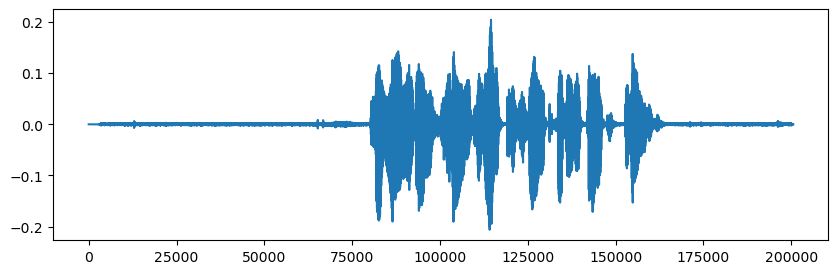

common_voice_en_20661764.mp3 (119600,) 22050


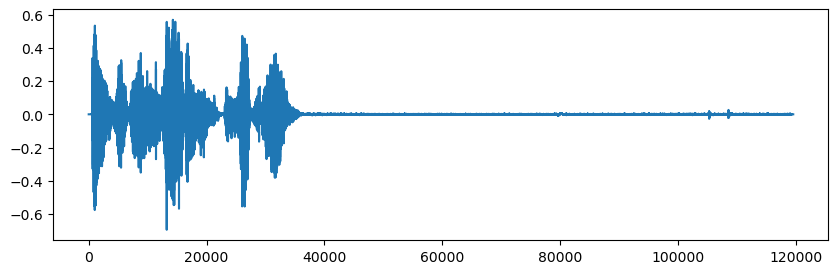

common_voice_en_1716.mp3 (130713,) 22050


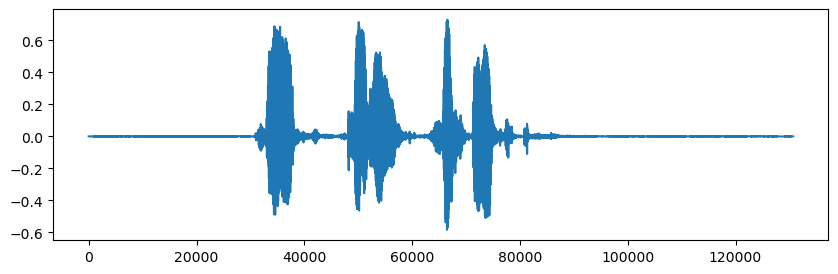

common_voice_en_20002554.mp3 (210093,) 22050


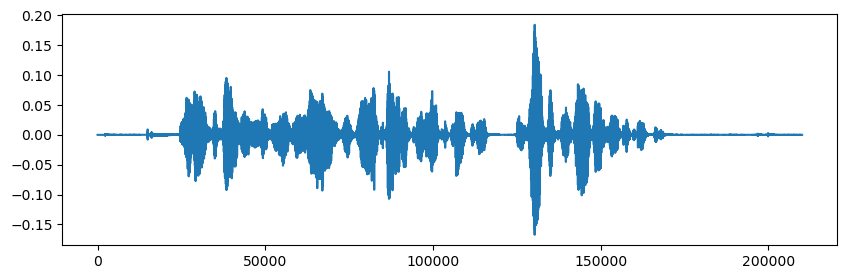

common_voice_en_30282850.mp3 (162729,) 22050


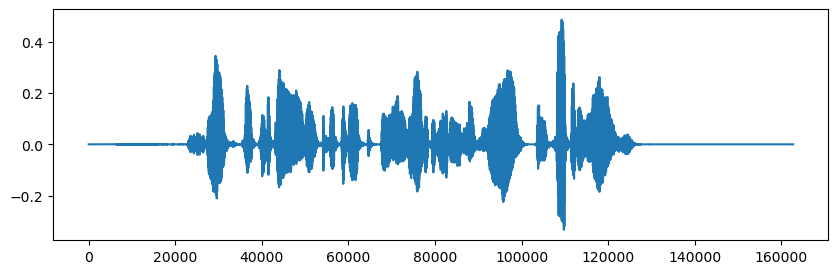

common_voice_en_39750682.mp3 (119070,) 22050


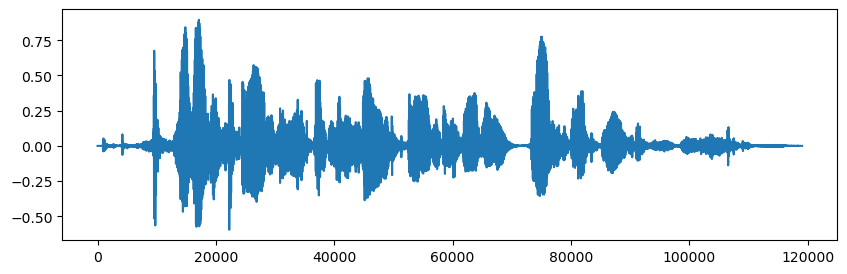

common_voice_en_37110064.mp3 (173049,) 22050


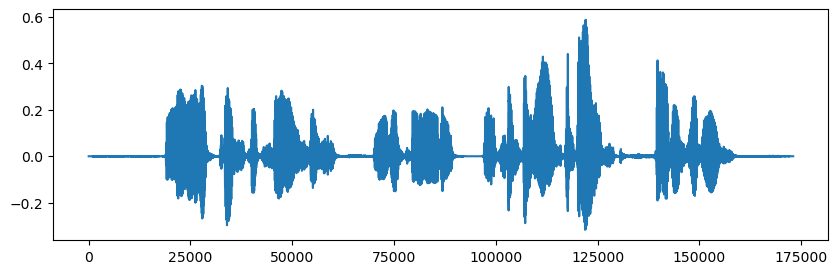

common_voice_en_31267867.mp3 (138915,) 22050


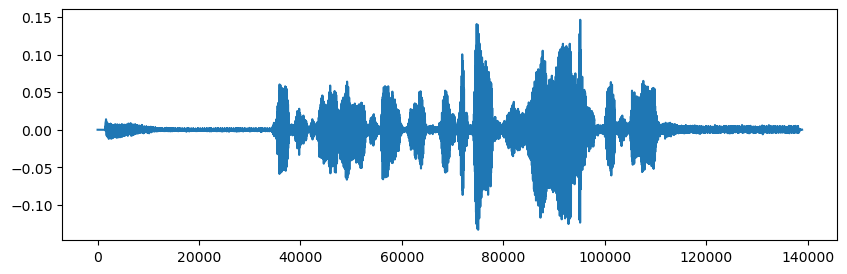

In [15]:
for a in audiofile: 
    x, sr = librosa.load(data_dir+a)
    print(a, x.shape, sr)
    plt.plot(x)
    plt.show()


Let's take a closer look at clip 5 (chosen because it sounds the clearest to me).

First we take original sample rate that came with the audio file. Then we take a downsampled version of the same clip.

Observe, is there any difference? in what way?

* when librosa load the voice data file, by default it sample the audio file to a fixed sampling rate, 22050. To get the original sampling rate that came with the audio file, we need to specify sr = None. We can also set a different sampling rate from the librosa default and different from the original sampling rate in the audio file, by specifying a sampling rate in the load function call. 

(236160,) 32000 (59040,) 8000


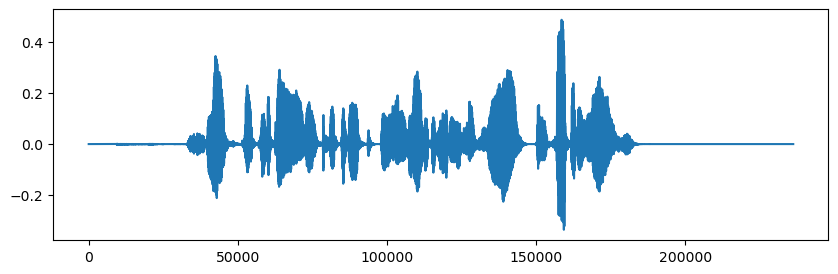

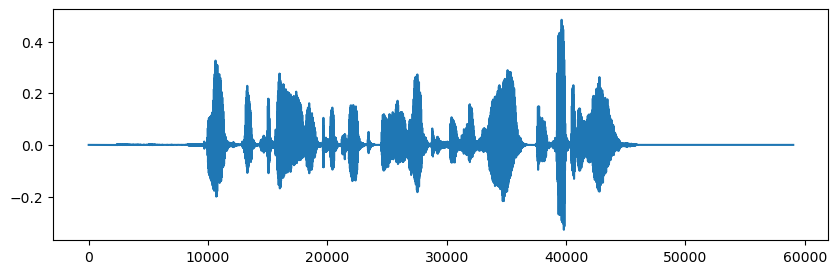

In [16]:
x1, sr1 = librosa.load(data_dir+audiofile[4], sr = None)
x2, sr2 = librosa.load(data_dir+audiofile[4], sr = 8000)

print(x1.shape, sr1, x2.shape, sr2)
plt.subplots(figsize=(10,3))
plt.plot(x1)
plt.subplots(figsize=(10,3))
plt.plot(x2)

Can we tell the difference by listening?

In [17]:
Audio(data=x1, rate = sr1)

In [18]:
Audio(data=x2, rate = sr2)

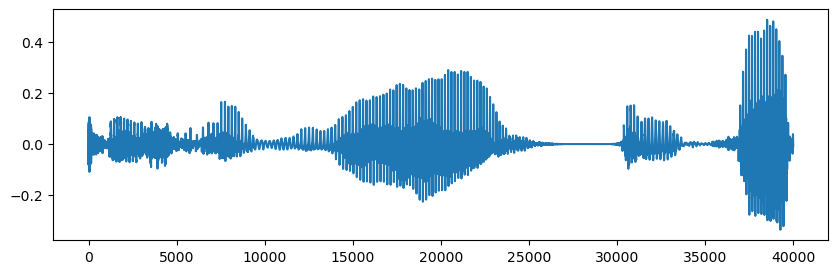

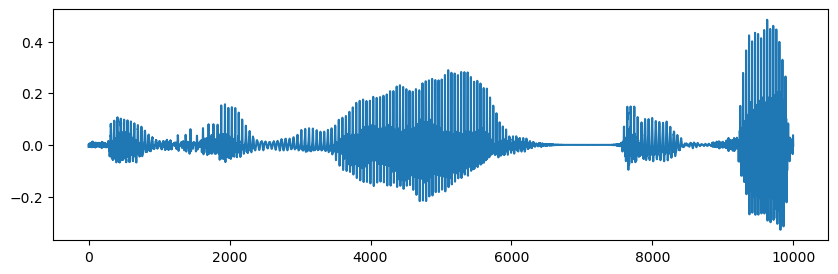

In [19]:
factor = sr1/sr2
start = 120000
end = 160000
plt.plot(x1[start:end])
plt.show()
plt.plot(x2[int(start/factor):int(end/factor)])
plt.show()

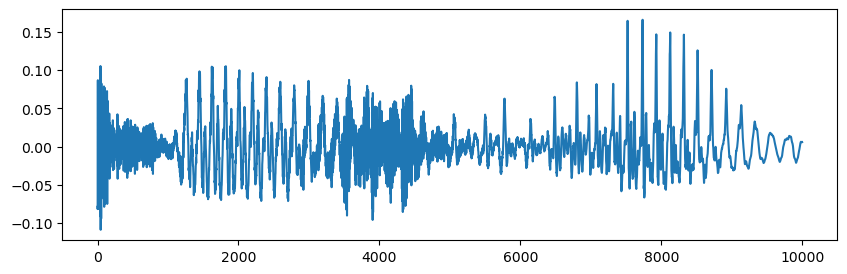

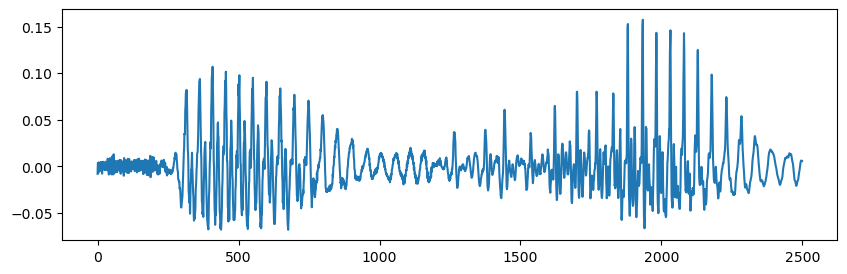

In [20]:
factor = sr1/sr2
start = 120000
end = 130000
plt.plot(x1[start:end])
plt.show()
plt.plot(x2[int(start/factor):int(end/factor)])
plt.show()

We can start to see difference when we zoom in more.

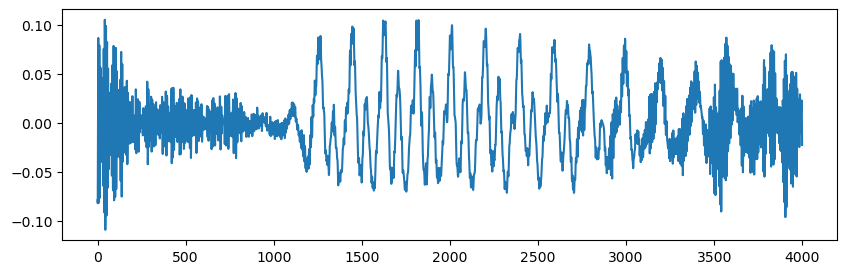

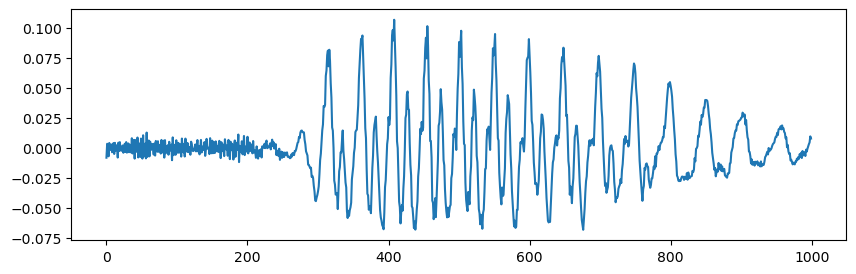

In [21]:
factor = sr1/sr2
start = 120000
end = 124000
plt.plot(x1[start:end])
plt.show()
plt.plot(x2[int(start/factor):int(end/factor)])
plt.show()

### Compute the fundamental frequency

We computer fundamental frequency of the clip using the librosa function "pyin", the probablistic version of algorithm YIN, which uses an autocorrelation approach to estimate fundamental frequency. 

* find autocorrelation at lag t, as a fundtion of t -> auto(t)
* find local maxima of the autocorrelation function auto(t)
* multiple local maxima exists, perhaps at the fixed multiple of the lags
* the lowest t that yield the local maxima would be the estimation of f0
* many caveats: padding values on the ends, range of search for local maxima, voiced frames vs. unvoiced frames, etc.

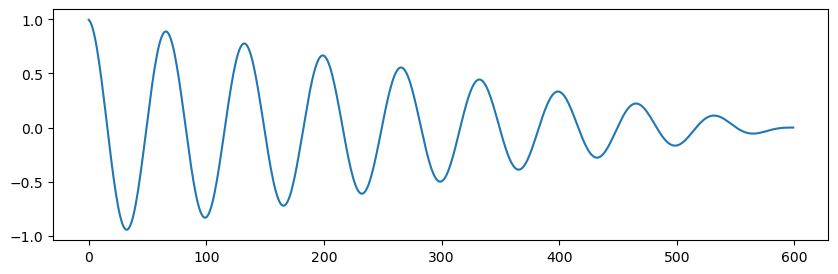

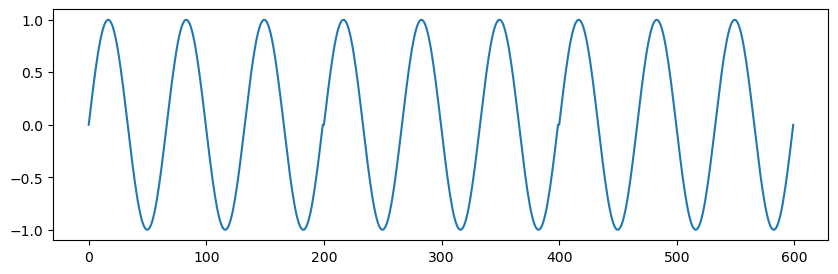

In [22]:
import numpy as np

def auto(x, lag):
    x_mean = np.mean(x)
    x_centered = x - x_mean
    numerator = np.sum(x_centered[:-lag] * x_centered[lag:])
    denominator = np.sum(x_centered**2)

    return numerator / denominator
def sine_array(n):
    x = np.linspace(0, 6 * np.pi, n)
    return np.sin(x)

x = np.concatenate((sine_array(200), sine_array(200),sine_array(200)))
#x = sine_array(600)
y=np.zeros(600)
for i in range(600):
    y[i]=auto(x, i+1)
plt.plot(y)
plt.show()
plt.plot(x)

Let's run librosa.pyin on two clips: one of female sixties, one of teen male.

(236160,) 32000


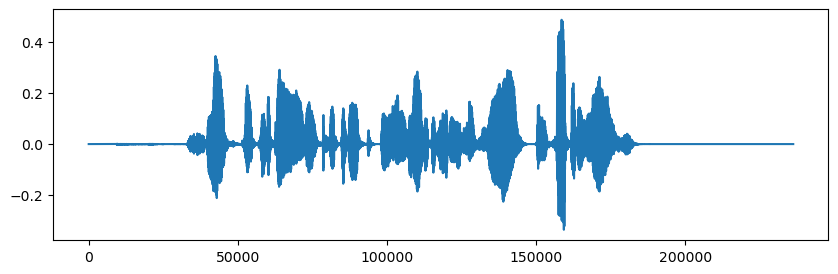

(251136,) 32000


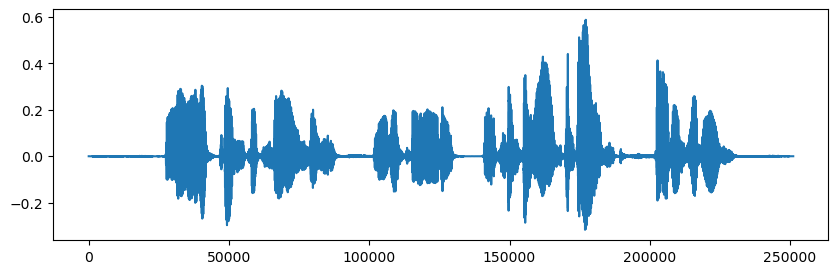

In [23]:
x1, sr1 = librosa.load(data_dir+audiofile[4], sr=None)
x2, sr2 = librosa.load(data_dir+audiofile[6], sr=None)
print(x1.shape, sr1)
plt.plot(x1)
plt.show()
print(x2.shape, sr2)
plt.plot(x2)
plt.show()

In [24]:
Audio(data=x1, rate = sr1)

In [25]:
Audio(data=x2, rate = sr2)

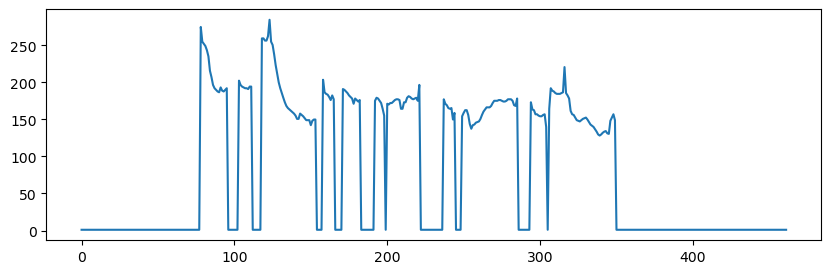

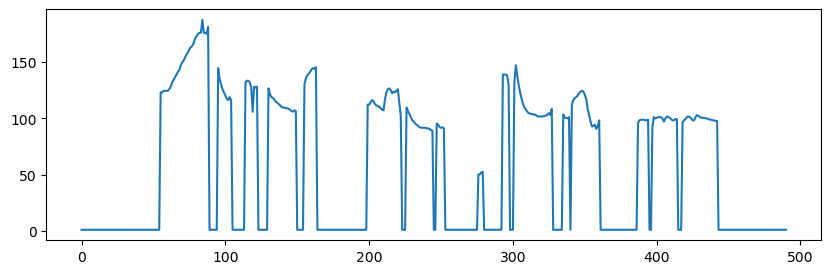

In [26]:
f0_x1, voiced_flag_x1, voiced_probs_x1 = librosa.pyin(
    x1,sr=sr1, fmin=50, fmax=1000, fill_na=True)
plt.plot(f0_x1)
plt.show()

f0_x2, voiced_flag_x2, voiced_probs_x2 = librosa.pyin(
    x2,sr=sr2, fmin=50, fmax=1000, fill_na=True)
plt.plot(f0_x2)
plt.show()

to get the mean f0, we need to take the mean over the voiced parts.

In [27]:
f0_x1[voiced_flag_x1].mean(), f0_x2[voiced_flag_x2].mean()

(175.09835300742748, 114.7067773896115)

If we use librosa.yin to compute f0, we need to carefully select the parameters of fmin and fmax, depending on the context. For human voice, we can specify fmin and fmax as 70 to 800, for instrument music, we may need to specify a higer range of fmax. 

In [28]:
librosa.yin(x1,sr=sr1,fmin=70,fmax=300).mean(), \
librosa.yin(x1,sr=sr1,fmin=70,fmax=1000).mean(), \
librosa.yin(x1,sr=sr1,fmin=70,fmax=2000).mean()


(201.24051407919276, 451.10857003432216, 823.2603543921284)

In [29]:
librosa.yin(x2,sr=sr2,fmin=70,fmax=180).mean(), \
librosa.yin(x2,sr=sr2,fmin=70,fmax=200).mean(), \
librosa.yin(x2,sr=sr2,fmin=70,fmax=300).mean(), \
librosa.yin(x2,sr=sr2,fmin=70,fmax=1000).mean(), \
librosa.yin(x2,sr=sr2,fmin=70,fmax=2000).mean()

(115.61189710888537,
 124.73216569325214,
 136.5099672136241,
 219.61733340524165,
 359.98194844630564)

In [30]:
y, sr = librosa.load(librosa.ex('trumpet'))
f0, voiced_flag, voiced_probs = librosa.pyin(
    y, sr=sr,
    fmin=librosa.note_to_hz('C2'),
    fmax=librosa.note_to_hz('C7'),
    fill_na=None)

In [31]:
Audio(data=y, rate=sr)

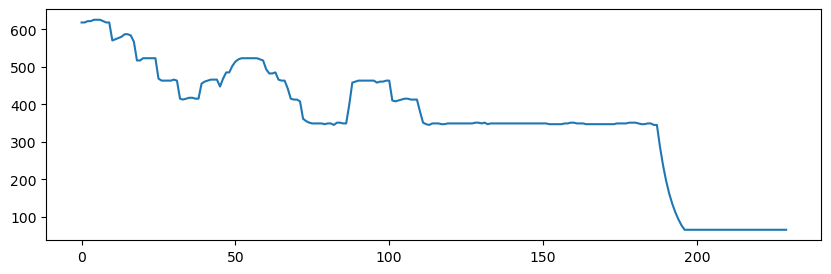

In [32]:
plt.plot(f0)

Librosa uses python package "soundfile" to read and write sound files. As a dependency, it is installed when we installed librosa.

In [33]:
import librosa
import soundfile as sf

# Get example audio file
filename = librosa.ex('trumpet')

data, samplerate = sf.read(filename, dtype='float32')
data = data.T
data_22k = librosa.resample(data, orig_sr=samplerate, target_sr=22050)

In [34]:
sf.available_formats()

{'AIFF': 'AIFF (Apple/SGI)',
 'AU': 'AU (Sun/NeXT)',
 'AVR': 'AVR (Audio Visual Research)',
 'CAF': 'CAF (Apple Core Audio File)',
 'FLAC': 'FLAC (Free Lossless Audio Codec)',
 'HTK': 'HTK (HMM Tool Kit)',
 'SVX': 'IFF (Amiga IFF/SVX8/SV16)',
 'MAT4': 'MAT4 (GNU Octave 2.0 / Matlab 4.2)',
 'MAT5': 'MAT5 (GNU Octave 2.1 / Matlab 5.0)',
 'MPC2K': 'MPC (Akai MPC 2k)',
 'MP3': 'MPEG-1/2 Audio',
 'OGG': 'OGG (OGG Container format)',
 'PAF': 'PAF (Ensoniq PARIS)',
 'PVF': 'PVF (Portable Voice Format)',
 'RAW': 'RAW (header-less)',
 'RF64': 'RF64 (RIFF 64)',
 'SD2': 'SD2 (Sound Designer II)',
 'SDS': 'SDS (Midi Sample Dump Standard)',
 'IRCAM': 'SF (Berkeley/IRCAM/CARL)',
 'VOC': 'VOC (Creative Labs)',
 'W64': 'W64 (SoundFoundry WAVE 64)',
 'WAV': 'WAV (Microsoft)',
 'NIST': 'WAV (NIST Sphere)',
 'WAVEX': 'WAVEX (Microsoft)',
 'WVE': 'WVE (Psion Series 3)',
 'XI': 'XI (FastTracker 2)'}

In [35]:
import sounddevice as sd
from scipy.io.wavfile import write

sr = 44100 
duration = 3  # in seconds for duration of recording

myrecording = sd.rec(int(duration * sr), samplerate=sr, channels=1)
sd.wait()  # Wait until recording is finished
write('myvoice.wav', sr, myrecording)  # Save as WAV file

In [36]:
sd.play(myrecording)

In [37]:
Audio(data=myrecording.T[0], rate=sr)

(132300,) 44100


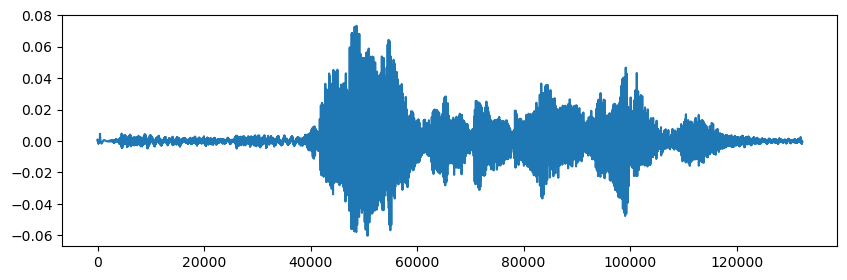

In [38]:
x, sr = librosa.load("myvoice.wav", sr = None)
print(x.shape, sr)
plt.plot(x)
Audio(data=x, rate=sr)

We can use soundfile to convert audio files from one format to another.

In [39]:
import soundfile as sf
x, sr = librosa.load("myvoice.wav")
sf.write('myvoice.flac', x, sr, format='flac')
sf.write('myvoice.mp3', x, sr, format='mp3')